<a href="https://colab.research.google.com/github/SurajKande/python-pandas/blob/master/case_study_olympic_medals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to connect gdrive to colab for importing dataset
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#importing data frame
medals = pd.read_csv('/content/gdrive/My Drive/datasets/all_medalists.csv', header=0)

In [47]:
medals.shape

(29216, 10)

In [48]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [49]:
medals.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [50]:
medals.tail(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


In [51]:
# to calculate the number of medals won by the countries
medals['NOC'].value_counts()

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
       ... 
DJI       1
KUW       1
GUY       1
UAE       1
TGA       1
Name: NOC, Length: 138, dtype: int64

In [0]:
# to perform proper analysis
medals_table = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')
medals_table['Total'] = medals_table.sum(axis = 1)
medals_table = medals_table.sort_values('Total', ascending=False)

In [53]:
medals_table

Medal,Bronze,Gold,Silver,Total
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
...,...,...,...,...
MRI,1.0,NaN,NaN,1.0
NIG,1.0,NaN,NaN,1.0
TGA,NaN,NaN,1.0,1.0


.nunique() :   Given a categorical Series S, S.nunique() returns the number of distinct categories.

In [0]:
# compute the number of medals each country won in distinct sports
country_won_events = medals.groupby('NOC')['Sport'].nunique().sort_values(ascending=False)

In [59]:
country_won_events

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
       ..
ERI     1
TAN     1
ECU     1
DJI     1
AFG     1
Name: Sport, Length: 138, dtype: int64

In [0]:
# USA vs USSR
cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)
is_usa_usr = medals.NOC.isin(['USA', 'URS'])
medals_cold_war = medals.loc[cold_war & is_usa_usr] 

In [61]:
medals_cold_war.groupby('NOC')['Sport'].nunique().sort_values(ascending=False)      # shows that usr won more than usa during cold war times

NOC
URS    21
USA    20
Name: Sport, dtype: int64

In [64]:
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc = 'count')
medals_won_by_country.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,39.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,5.0,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
medals_won_by_country.loc['1952':'1988', ['USA','URS']]

NOC,USA,URS
Edition,,
1952,130.0,117.0
1956,118.0,169.0
1960,112.0,169.0
1964,150.0,174.0
1968,149.0,188.0
1972,155.0,211.0
1976,155.0,285.0
1980,NaN,442.0
1984,333.0,NaN


In [72]:
medals_won_by_country.loc['1952':'1988', ['USA','URS']].idxmax(axis=1)        #idxmax() returns the index of maximizing element 

Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object

In [74]:
medals_won_by_country.loc['1952':'1988', ['USA','URS']].idxmax(axis='columns').value_counts()        #value_counts retuns the number of times a value has aapeared

URS    8
USA    2
dtype: int64

In [92]:
#compile usa data
usa_medals = medals[medals.NOC == 'USA']
usa_medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold


In [0]:
usa_medals  = usa_medals.groupby(['Edition','Medal']).agg('count')

In [89]:
usa_medals

City  Sport  Discipline  ...  Gender  Event  Event_gender
Edition Medal                            ...                             
1896    Bronze     2      2           2  ...       2      2             2
        Gold      11     11          11  ...      11     11            11
        Silver     7      7           7  ...       7      7             7
1900    Bronze    14     14          14  ...      14     14            14
        Gold      27     27          27  ...      27     27            27
...              ...    ...         ...  ...     ...    ...           ...
2004    Gold     116    116         116  ...     116    116           116
        Silver    75     75          75  ...      75     75            75
2008    Bronze    81     81          81  ...      81     81            81
        Gold     125    125         125  ...     125    125           125
        Silver   109    109         109  ...     109    109           109

[75 rows x 8 columns]

In [0]:
usa_medals  = usa_medals.groupby(['Edition','Medal'])['Athlete'].agg('count')

In [94]:
usa_medals

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
                  ... 
2004     Gold      116
         Silver     75
2008     Bronze     81
         Gold      125
         Silver    109
Name: Athlete, Length: 75, dtype: int64

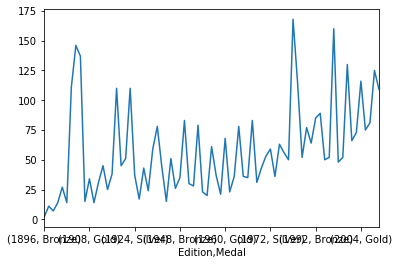

<Figure size 3600x3600 with 0 Axes>

In [97]:
usa_medals.plot()
plt.figure(figsize=(50,50))
plt.show()

In [0]:
usa_medals = usa_medals.unstack(level='Medal')

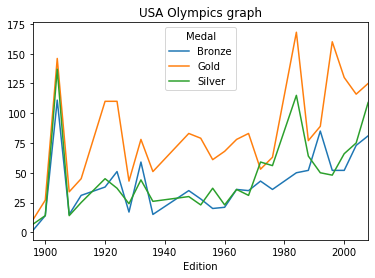

In [106]:
usa_medals.plot()
plt.title('USA Olympics graph')
plt.show()

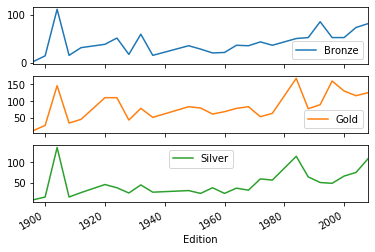

<Figure size 3600x3600 with 0 Axes>

In [111]:
#alt
usa_medals.plot(subplots=True)
plt.figure(figsize=(50,50))
plt.show()

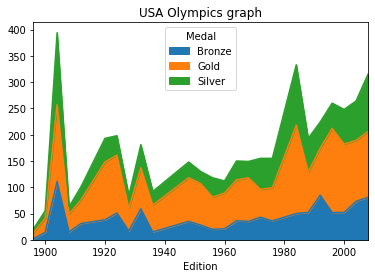

In [115]:
#alt
usa_medals.plot.area()
plt.title('USA Olympics graph')
plt.show()